 # Step 1: Load and Explore the Dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the red wine dataset
df = pd.read_csv("winequality-red.csv", sep=';')
print(df.head())
print(df.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

# Step 2: Normalize/Standardize Features

In [9]:
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis=1)
y = df['quality']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Implement Linear Regression from Scratch

In [10]:
import numpy as np

def compute_cost(X, y, weights):
    m = len(y)
    predictions = X.dot(weights)
    cost = (1/2*m) * np.sum((predictions - y)**2)
    return cost


# Step 4: Implement BGD, SGD, and MBGD

In [11]:
def batch_gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        prediction = X.dot(weights)
        gradient = (1/m) * X.T.dot(prediction - y)
        weights -= lr * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history


Stochastic Gradient Descent (SGD)

In [12]:
def stochastic_gradient_descent(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            x_i = X[rand_index, :].reshape(1, -1)
            y_i = y[rand_index]
            prediction = x_i.dot(weights)
            gradient = x_i.T.dot(prediction - y_i)
            weights -= lr * gradient.flatten()
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history


 Mini-batch Gradient Descent (MBGD)

In [14]:
def mini_batch_gradient_descent(X, y, lr=0.01, batch_size=32, iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            prediction = X_batch.dot(weights)
            gradient = X_batch.T.dot(prediction - y_batch) / batch_size
            weights -= lr * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history


# Step 5: Analyze Learning Rate Schedules

In [15]:
def time_decay_lr(initial_lr, decay_rate, epoch):
    return initial_lr / (1 + decay_rate * epoch)


# Step 6: Plot Cost vs Iterations

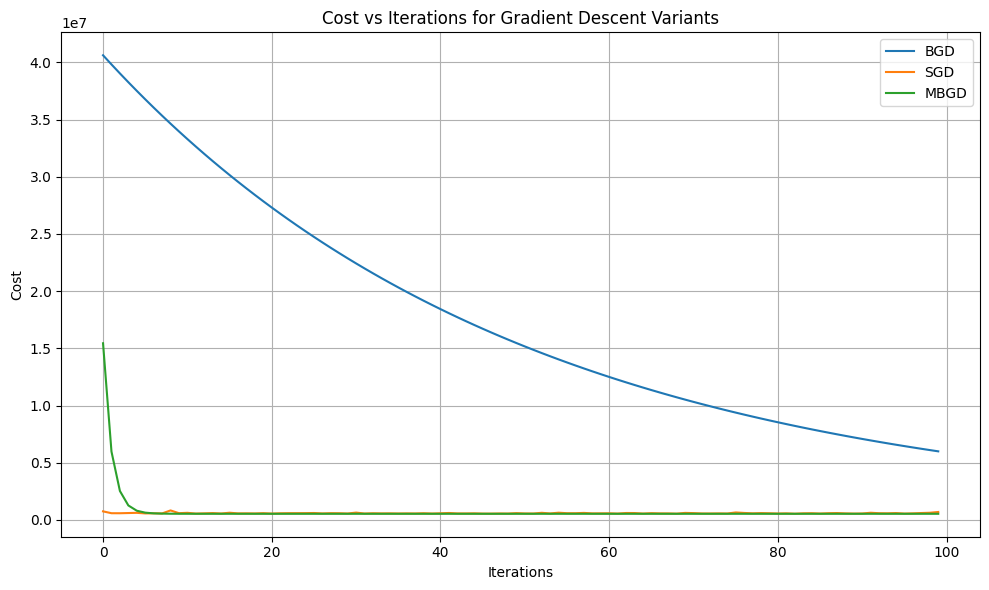

In [17]:
# Assuming X_scaled and y are already prepared
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # Add bias term

# Run the optimizers
weights_bgd, cost_bgd = batch_gradient_descent(X_b, y, lr=0.01, iterations=100)
weights_sgd, cost_sgd = stochastic_gradient_descent(X_b, y, lr=0.01, iterations=100)
weights_mbgd, cost_mbgd = mini_batch_gradient_descent(X_b, y, lr=0.01, batch_size=32, iterations=100)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cost_bgd, label="BGD")
plt.plot(cost_sgd, label="SGD")
plt.plot(cost_mbgd, label="MBGD")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations for Gradient Descent Variants")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
